# Exploratory Analysis

### importing libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import *
from sklearn.preprocessing import StandardScaler
from scipy import stats


### loading dataset

In [2]:
df=pd.read_csv("marketplace.csv",index_col="date",parse_dates=True)
# loading the date column as index to the dataframe and parsing it as well
df.head()

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
2020-03-11,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
2020-03-26,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2020-03-23,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
2020-04-29,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
2020-04-15,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


### initial description

In [3]:
df.describe()

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,26007.000000,2.601400e+04,26014.000000,2.601400e+04,26014.000000,26014.000000,26014.000000,26014.000000,26014.000000
mean,1562.011112,3.890569e+06,344553.702083,1.582145e+06,0.737257,58.814331,98.339279,46.343969,152.429807
std,1041.170081,3.868790e+06,474104.795100,1.603716e+07,7.453432,473.091001,5.485507,91.149600,321.367828
min,1.000000,5.350000e+05,0.000000,-2.342700e+08,-82.000000,0.000000,0.000000,0.000000,0.000000
25%,854.000000,1.770000e+06,4.000000,0.000000e+00,0.000000,2.000000,98.000000,10.000000,27.000000
50%,1252.000000,2.599999e+06,37.000000,0.000000e+00,0.000000,5.000000,100.000000,24.000000,63.000000
75%,2287.000000,4.093925e+06,999972.000000,0.000000e+00,0.000000,21.000000,100.000000,44.000000,144.000000
max,4247.000000,5.000000e+07,999999.000000,9.415350e+08,441.000000,38993.000000,100.000000,2842.000000,7724.000000


In [4]:
df.isnull().sum()

sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

<AxesSubplot:ylabel='date'>

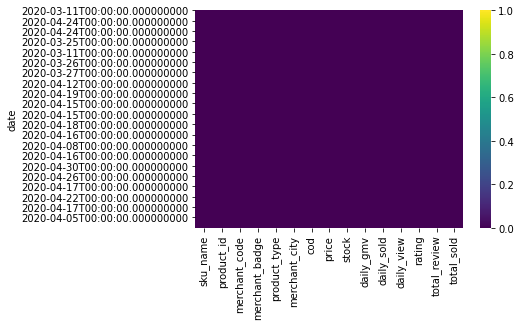

In [5]:
# plotting heat map to show null values
sns.heatmap(df.isnull(),cmap='viridis') ## highly clean dataset with only 7 null values in a single column

### No columns with dominating NULL values
> no column needs to be dropped as of now


### 7 tuples with NULL values in field "merchant_code"
> can be dropped

In [6]:
df=df.dropna() # dropping those tuples
df.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

<AxesSubplot:ylabel='date'>

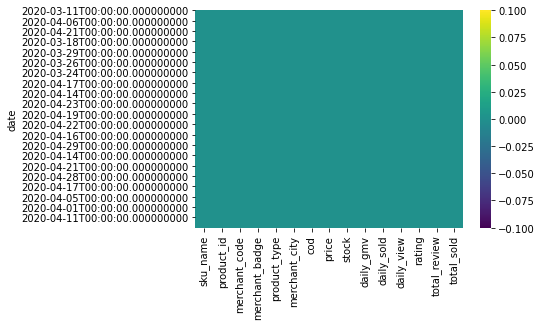

In [7]:
sns.heatmap(df.isnull(),cmap='viridis')

>boxplots for features

<AxesSubplot:ylabel='merchant_code'>

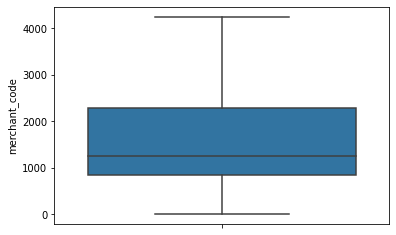

In [8]:

sns.boxplot(y='merchant_code',data=df)

<AxesSubplot:ylabel='price'>

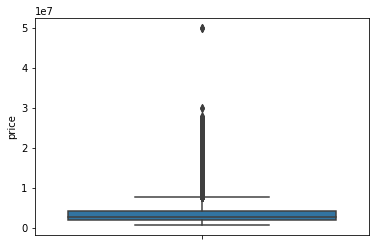

In [9]:
sns.boxplot(y='price',data=df)

<AxesSubplot:ylabel='stock'>

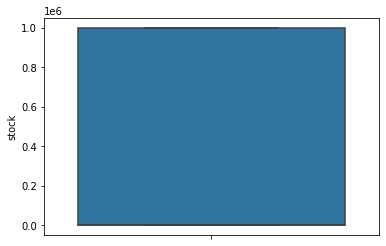

In [10]:
sns.boxplot(y='stock',data=df)

<AxesSubplot:ylabel='daily_gmv'>

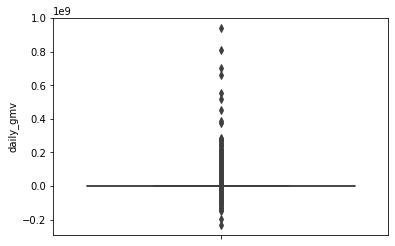

In [11]:
sns.boxplot(y='daily_gmv',data=df)

<AxesSubplot:ylabel='daily_sold'>

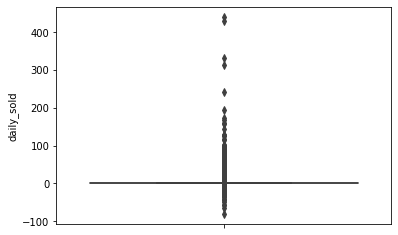

In [12]:
sns.boxplot(y='daily_sold',data=df)

<AxesSubplot:ylabel='daily_view'>

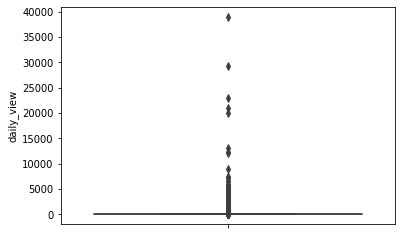

In [13]:
sns.boxplot(y='daily_view',data=df)

<AxesSubplot:ylabel='rating'>

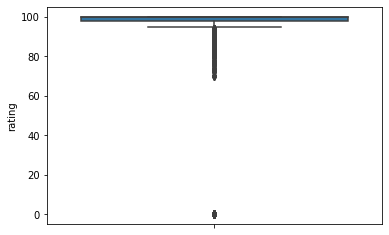

In [14]:
sns.boxplot(y='rating',data=df)

<AxesSubplot:ylabel='total_review'>

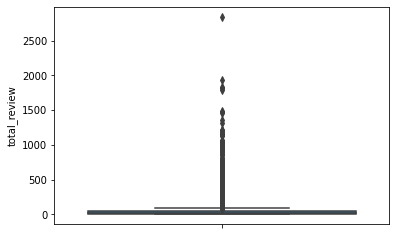

In [15]:
sns.boxplot(y='total_review',data=df)

>correlation matrix

<AxesSubplot:>

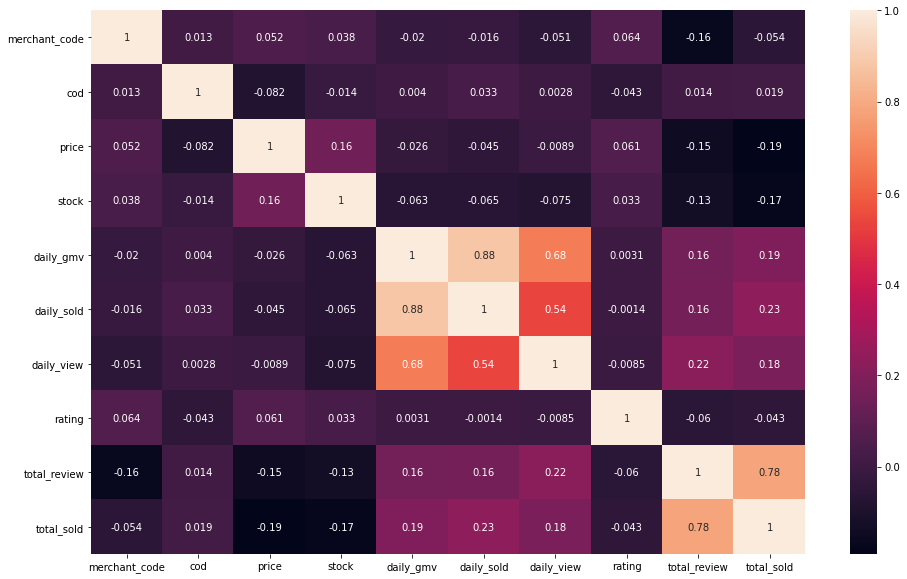

In [16]:
corrmatrix=df.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corrmatrix, annot=True)

### plotting
>total_sold vs date

<AxesSubplot:xlabel='date'>

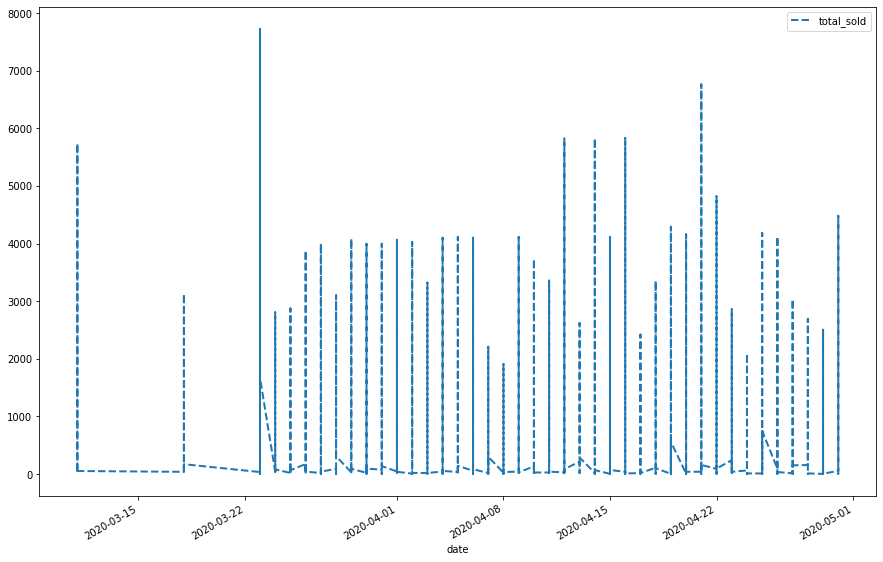

In [17]:
df[['total_sold']].plot(figsize=(15, 10),style=[ '--'],lw=2)

>plotting variables grouped by day of week

In [18]:
df_week = df[['daily_view','total_sold','total_review','rating']].groupby(df.index.weekday).sum() # they have similar range
df_week

,daily_view,total_sold,total_review,rating
date,,,,
0,239874,575517,167742,366134
1,193305,575324,171872,396506
2,334592,782640,236245,496246
3,254878,583539,181947,352151
4,163663,467891,147168,306335
5,153819,458902,146002,316334
6,189841,521126,154557,323900


<ipython-input-19-5ee74aac5580>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))


(0.0, 814471.9)

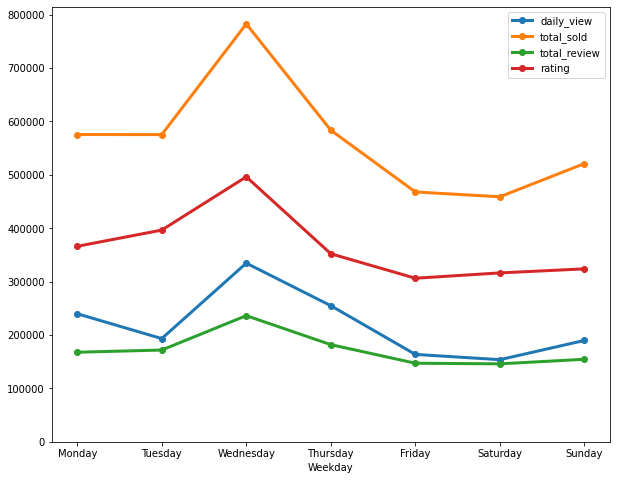

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

In [20]:
df_week = df[['stock','price','daily_gmv']].groupby(df.index.weekday).sum() # they have similar range
df_week

,stock,price,daily_gmv
date,,,
0,1209569462,13876702281,6896976128
1,1428182873,16611080428,4822291986
2,1783033796,20103019946,10863587351
3,1204889107,12868007873,4200600761
4,1050230945,12015689127,4470749054
5,1091570870,12723669029,4448481420
6,1193742519,12994420335,5455231562


<ipython-input-21-5ee74aac5580>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))


(0.0, 21055659396.05)

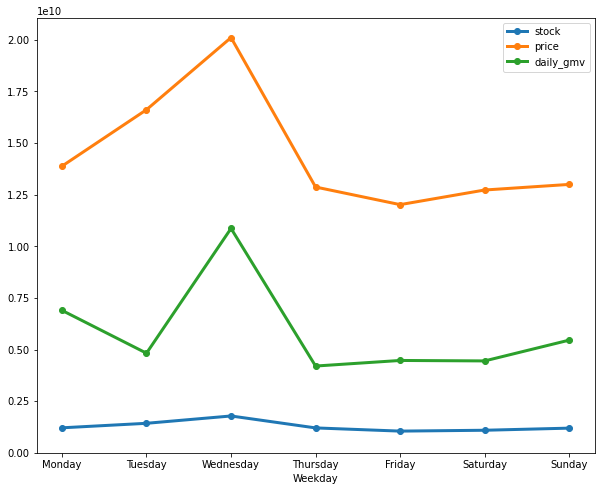

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

>total_sold w.r.t the categorical variable cod

>exploring how total_sold varies with the binary values of cod

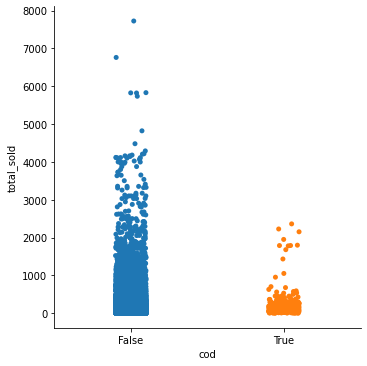

In [22]:
sns.catplot(x="cod", y="total_sold",data=df)

>exploring top 20 brands in terms of number of products

In [23]:
df['product_type'].value_counts()

Realme 6               2161
Samsung Galaxy A10s    1062
Xiaomi Redmi Note 8    1025
Xiaomi Redmi 7A         858
Xiaomi Redmi 6A         747
                       ... 
Oppo Joy 3                1
vivo Y21                  1
Infinix Hot S             1
vivo Y51                  1
Xiaomi Mi 5c              1
Name: product_type, Length: 361, dtype: int64

In [24]:
top_brands=df['product_type'].value_counts().head(20)

In [25]:
top_brands.to_frame(name="count")

,count
Realme 6,2161
Samsung Galaxy A10s,1062
Xiaomi Redmi Note 8,1025
Xiaomi Redmi 7A,858
Xiaomi Redmi 6A,747
Xiaomi Redmi Note 8 Pro,616
Apple iPhone 7 Plus,611
Apple iPhone 7,561
Xiaomi Redmi Note 7,523
Apple iPhone X,450


<AxesSubplot:>

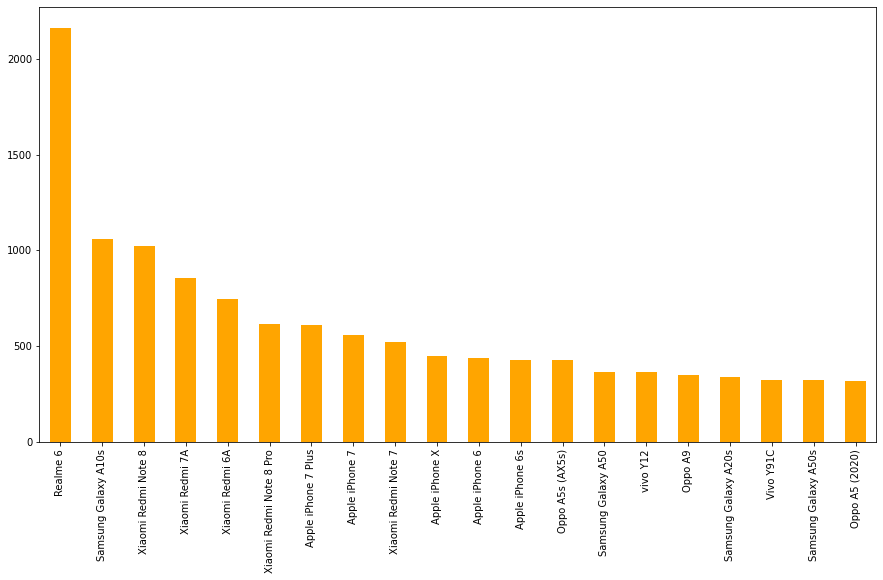

In [26]:
top_brands.plot.bar(color="orange",figsize=(15, 8))

>exploring top ten costliest w.r.t product type

In [27]:
bytype=df.groupby("product_type")
costliest=bytype.max("price")
costliest

,merchant_code,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
product_type,,,,,,,,,,
Apple iPhone,2756.0,False,21790000,999999,7000000,1,12,100,12,95
Apple iPhone 11,3198.0,False,18069000,999999,47850000,3,870,100,424,550
Apple iPhone 11 Pro,3670.0,False,24999000,999999,39000000,2,2118,100,256,355
Apple iPhone 11 Pro Max,4085.0,False,30000000,999999,222750000,9,6529,100,362,563
Apple iPhone 4,2796.0,True,3550000,999999,0,0,3,100,11,17
...,...,...,...,...,...,...,...,...,...,...
vivo Y93,2717.0,False,3000000,999999,9750000,6,833,100,647,974
vivo Y95,2720.0,False,4000000,999999,3000000,1,131,100,494,700
vivo Z1,2541.0,False,3000000,9982,0,0,23,92,5,29


In [28]:
costliest.nlargest(10,["price"])

,merchant_code,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
product_type,,,,,,,,,,
Apple iPhone 7 Plus,3767.0,True,50000000,999999,120275000,17,1184,100,218,607
Apple iPhone 11 Pro Max,4085.0,False,30000000,999999,222750000,9,6529,100,362,563
Samsung Galaxy Fold,1989.0,False,27885000,999978,0,0,86,100,18,24
Apple iPhone XS Max,3808.0,False,26500000,999999,14639000,1,480,100,129,306
Apple iPhone 11 Pro,3670.0,False,24999000,999999,39000000,2,2118,100,256,355
Apple iPhone X,3139.0,False,24598000,999999,12499000,1,544,100,120,233
Samsung Galaxy Fold 5G,2353.0,False,24500000,2,0,0,0,100,11,24
Apple iPhone XS,3327.0,False,23900000,999999,14645000,1,207,100,133,322
Apple iPhone,2756.0,False,21790000,999999,7000000,1,12,100,12,95


<AxesSubplot:xlabel='product_type'>

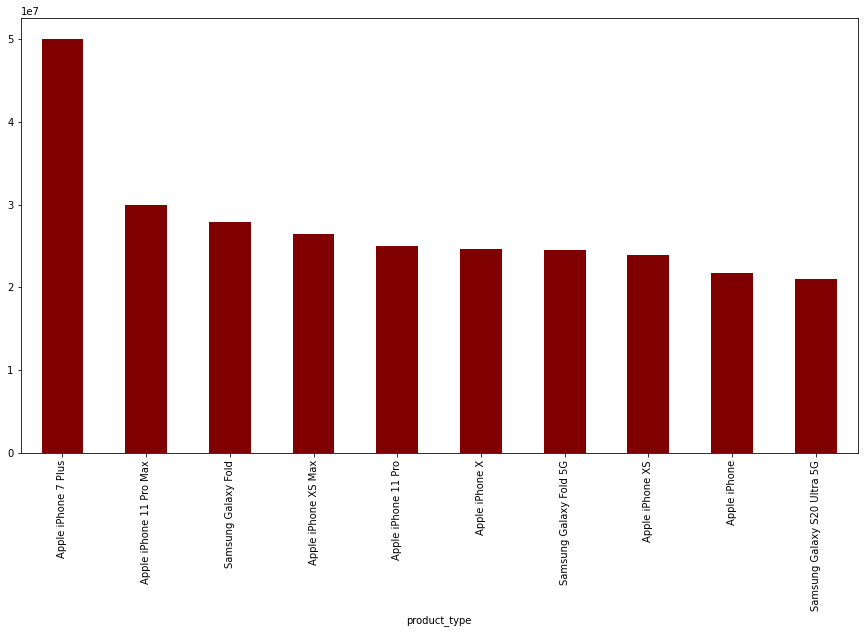

In [29]:
costliest=costliest.nlargest(10,["price"])["price"]
costliest.plot.bar(color="maroon",figsize=(15, 8))

In [30]:
df = df.sort_values(by='date')
df

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
2020-03-11,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
2020-03-11,SAMSUNG A10S Ram 2-32 GB,E1319,2082.0,PM,Samsung Galaxy A10s,Kab. Bekasi,False,1616000,30,0,0,0,98,125,1546
2020-03-11,Vivo Z1 Pro 4/64 GB 64GB Garansi Resmi - Biru,E813,1295.0,PM,vivo Z1Pro,Kota Tangerang Selatan,False,2945000,2,0,0,0,99,24,51
2020-03-11,Samsung A10S 2/32 Garansi Resmi Baru Segel - H...,F1176,1845.0,PM,Samsung Galaxy A10s,Kab. Sleman,False,1615000,3,0,0,0,100,21,58
2020-03-11,VIVO Z1 PRO RAM 4/64 GB GARANSI RESMI VIVO IND...,E818,875.0,PM,vivo Z1Pro,Kota Administrasi Jakarta Barat,False,3279000,999999,0,0,0,98,137,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,VIVO Y12 RAM 3/64GB GARANSI RESMI VIVO INDONES...,E708,875.0,PM,vivo Y12,Kota Administrasi Jakarta Barat,False,1789000,9851,5367000,3,230,98,405,705
2020-04-30,REALME 6 PRO 8/128 6/128 4/64 - 8GB 6GB/128GB ...,G245,976.0,PM,Realme 6,Kota Administrasi Jakarta Pusat,False,4181000,8,33448000,8,435,97,29,51
2020-04-30,samsungA30,E1214,1910.0,PM,Samsung Galaxy A30,Kab. Tegal,False,3000000,96,0,0,3,100,50,231


### Normalising the continous variables

In [31]:
sc= StandardScaler()
df_new=df.copy()
column_names = ['price','stock','daily_gmv','daily_sold','daily_view','rating','total_review'] # List of columns that must be normalized
features = df_new[column_names]
scaler = sc.fit(features.values)
features = scaler.transform(features.values)
df_new[column_names] = features
df=df_new

In [32]:
def get_dataset(name, mobile_dict):
    #A dictionary that will contain the unique mobile phone models as keys and their corresponding sales information in the
    #form of a dataframe as values
    if mobile_dict:
       # mobile_dict[name].set_index('week')
        return mobile_dict[name]

    #Getting the list of attributes needed to recreate the sales data dataframe for the individual phone models.
    column_list = []
    for i in df:
        column_list.append(i)
    

    #Creating the dataframes 
    for i in df['product_type'].unique():
        mobile_dict[i] = pd.DataFrame(columns=column_list)
  
    #Copying information into the dataframes
    for i in mobile_dict:
        mobile_dict[i] = df.loc[df['product_type'] == i]
    
    # Dropping date as it isn't unifomrly distributed and dropping product_type as it already happens to be 
    #the key in the dictionary

    for i in mobile_dict.keys():
        for column in mobile_dict[i].columns:
            if column in ['date', 'product_type']:
                del mobile_dict[i][column]

    #Appending the week column for each of the dataframes
    for i in mobile_dict.keys():
        week = []
        for j in range(1, len(mobile_dict[i]) + 1):
            week.append(str(j))
    
        mobile_dict[i].insert(1, "week", week, True)
    
    # removing outliers
    column_names = ['price','stock','daily_gmv','daily_sold','daily_view','rating','total_review']
    for clm_name in mobile_dict[name].columns:
        if clm_name in column_names:
            q_low = mobile_dict[name][clm_name].quantile(0.01)
            q_hi  = mobile_dict[name][clm_name].quantile(0.99)

            df_filtered = mobile_dict[name][(mobile_dict[name][clm_name] < q_hi) & (mobile_dict[name][clm_name] > q_low)]

    # dropping all unnecessary columns
    
    df_filtered.drop(['sku_name','merchant_code','merchant_badge'],axis=1,inplace=True)
    # encoding categorical variables
    df_filtered=pd.get_dummies(data=df_filtered,columns=['cod','merchant_city','product_id'])
    return df_filtered #mobile_dict[name]

In [33]:
mobile_dict={}
curr_data=get_dataset('vivo V9',mobile_dict)#('Huawei nova 5T',mobile_dict)
curr_data

/home/sriram/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,week,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold,cod_False,...,product_id_C653,product_id_D351,product_id_D352,product_id_D926,product_id_D927,product_id_D928,product_id_D929,product_id_D930,product_id_D931,product_id_F1579
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,1,-0.488739,-0.705706,-0.098670,-0.098930,1.059234,-0.613162,1.488031,329,1,...,0,0,0,0,0,0,0,0,0,0
2020-03-24,2,0.286637,-0.726756,-0.098670,-0.098930,-0.117996,0.303926,-0.091645,85,1,...,0,0,1,0,0,0,0,0,0,0
2020-03-27,3,-0.488739,-0.705706,-0.098670,-0.098930,0.165215,-0.613162,1.488031,329,1,...,0,0,0,0,0,0,0,0,0,0
2020-03-31,4,-0.230280,1.382425,-0.098670,-0.098930,-0.111656,0.303926,-0.091645,38,1,...,0,1,0,0,0,0,0,0,0,0
2020-03-31,5,-0.308077,1.382469,-0.098670,-0.098930,-0.113769,0.303926,-0.376864,16,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,67,0.105716,1.382467,-0.098670,-0.098930,-0.122223,0.303926,-0.289104,33,1,...,0,0,0,0,0,0,0,0,0,0
2020-04-30,68,-0.230280,1.382465,-0.098670,-0.098930,-0.122223,0.120508,-0.212315,43,1,...,0,0,0,0,0,1,0,0,0,0
2020-04-30,69,-0.488739,-0.705697,-0.098670,-0.098930,-0.090520,-0.613162,1.488031,329,1,...,0,0,0,0,0,0,0,0,0,0


# Simple Linear Regression

>Since total_review is the highly correlated with total_Sold

In [34]:
X=curr_data['total_review'].values.astype(float)
Y=curr_data['total_sold'].values.astype(float)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [36]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [37]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(X_test)

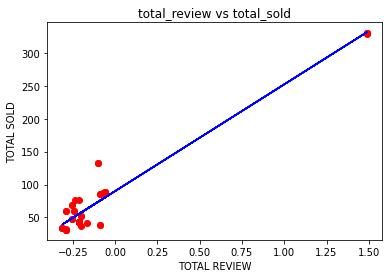

In [39]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('total_review vs total_sold')
plt.xlabel('TOTAL REVIEW')
plt.ylabel('TOTAL SOLD')
plt.show()

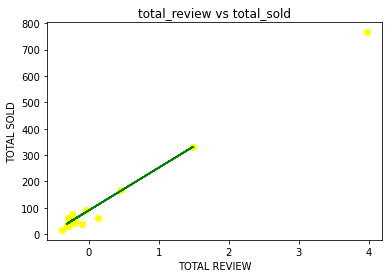

In [40]:
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('total_review vs total_sold')
plt.xlabel('TOTAL REVIEW')
plt.ylabel('TOTAL SOLD')
plt.show()

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9838495560443409

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

15.412147518180992

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

427.58492712488174

# Multiple Linear Regression

In [44]:
X=curr_data.copy()
X.drop(['total_sold'],axis=1,inplace=True)
Y=curr_data['total_sold'].values.astype(float)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(X_test)

In [48]:
r2_score(y_test, y_pred)

0.9998727305708472

In [49]:
mean_absolute_error(y_test, y_pred)

0.367428483502798

In [50]:
mean_squared_error(y_test, y_pred)

0.7564823442118728

In [51]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 58.98  59.  ]
 [ 43.01  43.  ]
 [167.   167.  ]
 [329.96 329.  ]
 [ 30.98  31.  ]
 [ 37.98  38.  ]
 [ 48.03  48.  ]
 [ 42.99  43.  ]
 [ 90.06  93.  ]
 [ 75.99  77.  ]
 [ 59.01  59.  ]
 [ 34.01  34.  ]
 [ 37.99  38.  ]
 [ 52.08  52.  ]]


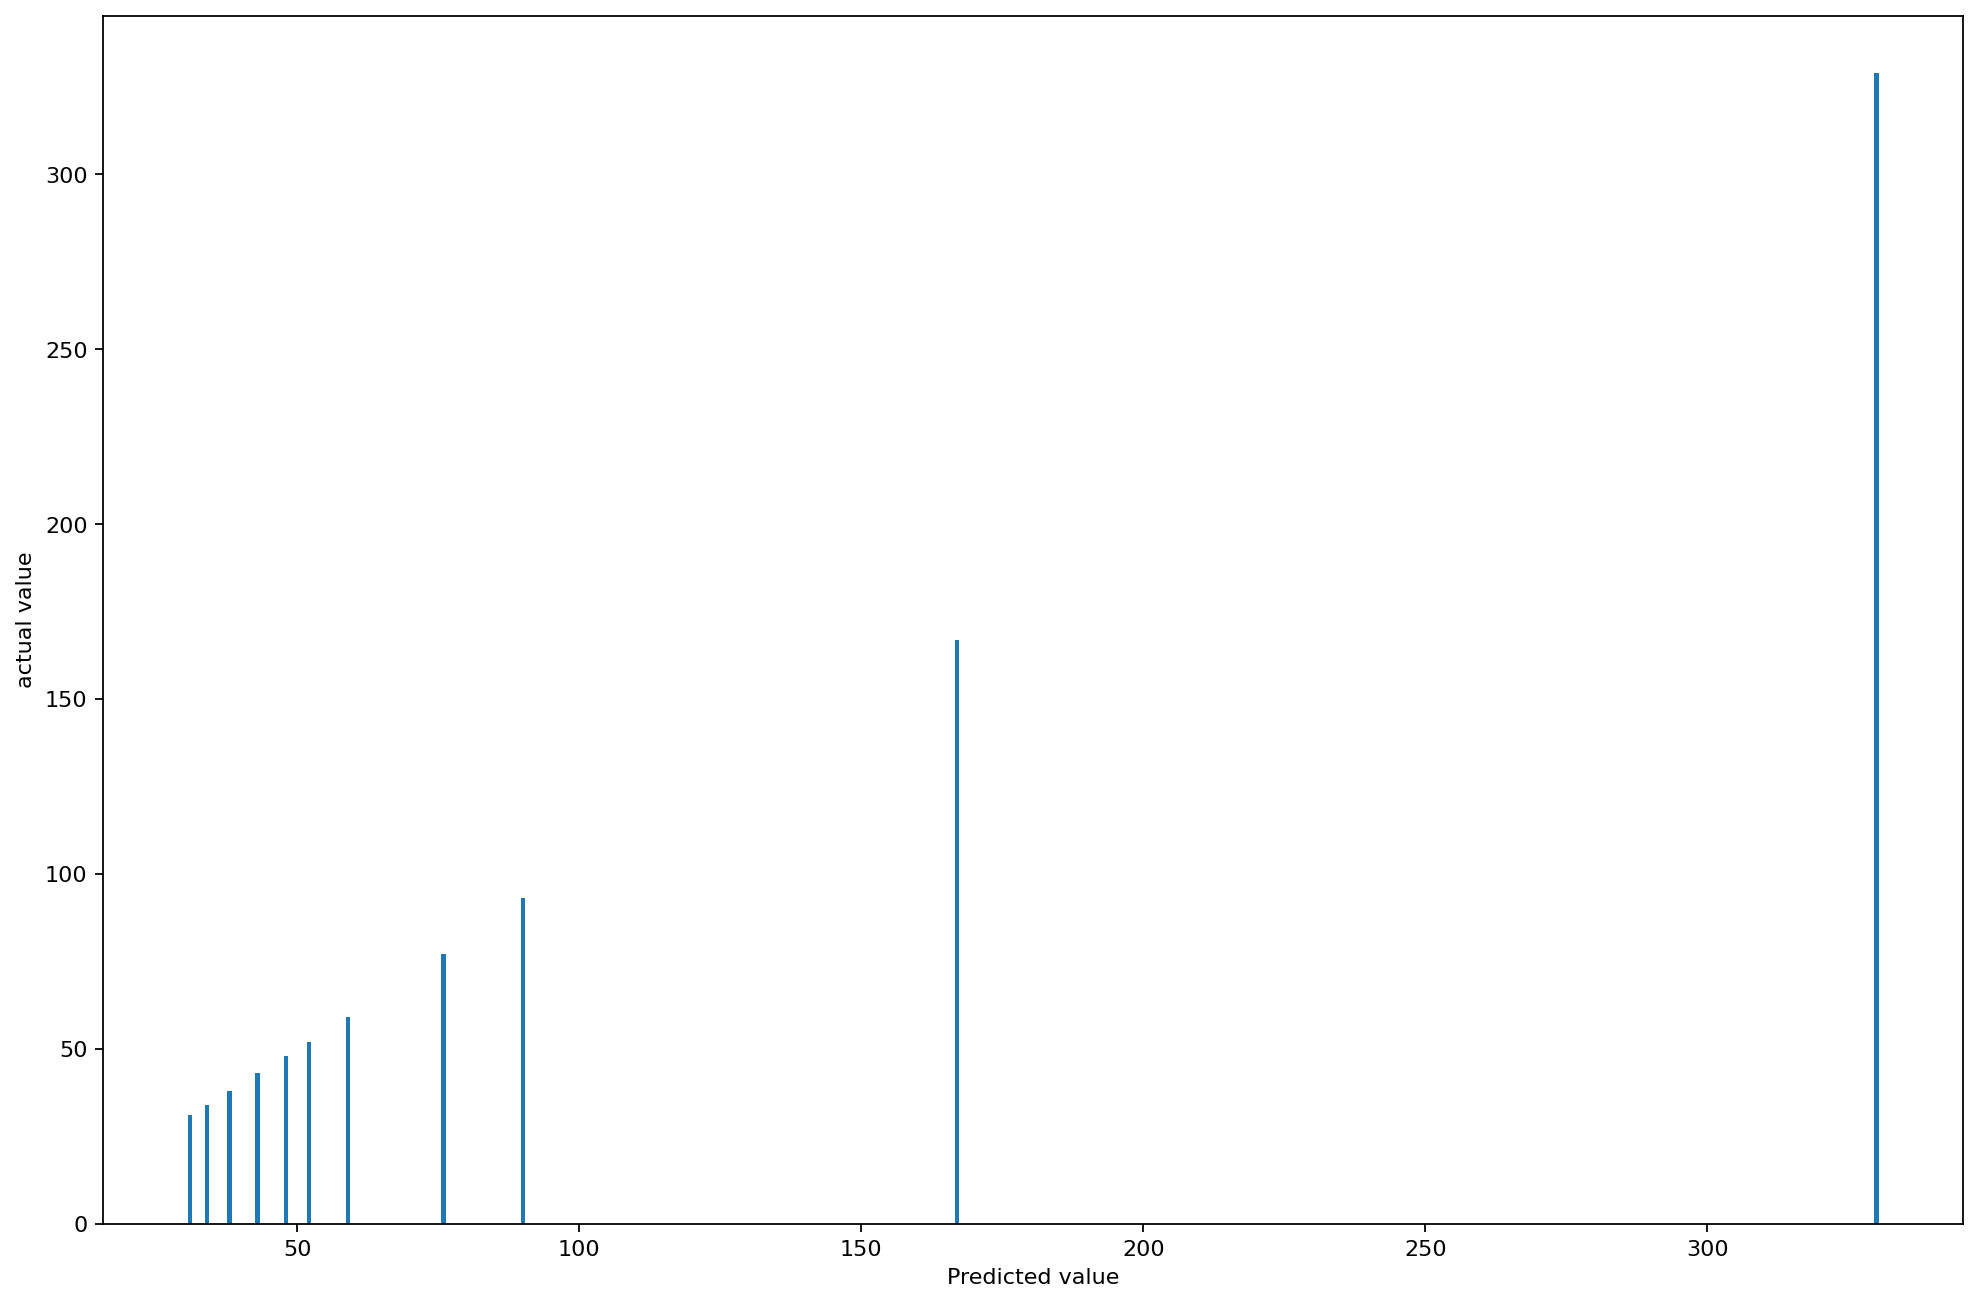

In [52]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=160, facecolor='w', edgecolor='k')

plt.bar(y_pred,y_test)
plt.xlabel('Predicted value')
plt.ylabel('actual value')
plt.show()

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [54]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [55]:
y_pred = regressor.predict(X_test)

In [56]:
r2_score(y_test, y_pred)

0.9962252095041

In [57]:
mean_absolute_error(y_test, y_pred)

3.4285714285714284

In [58]:
mean_squared_error(y_test, y_pred)

22.437142857142852

In [59]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 50.3  59. ]
 [ 46.4  43. ]
 [170.4 167. ]
 [330.  329. ]
 [ 31.   31. ]
 [ 38.   38. ]
 [ 54.8  48. ]
 [ 43.   43. ]
 [ 87.8  93. ]
 [ 71.7  77. ]
 [ 49.2  59. ]
 [ 34.3  34. ]
 [ 38.   38. ]
 [ 47.9  52. ]]


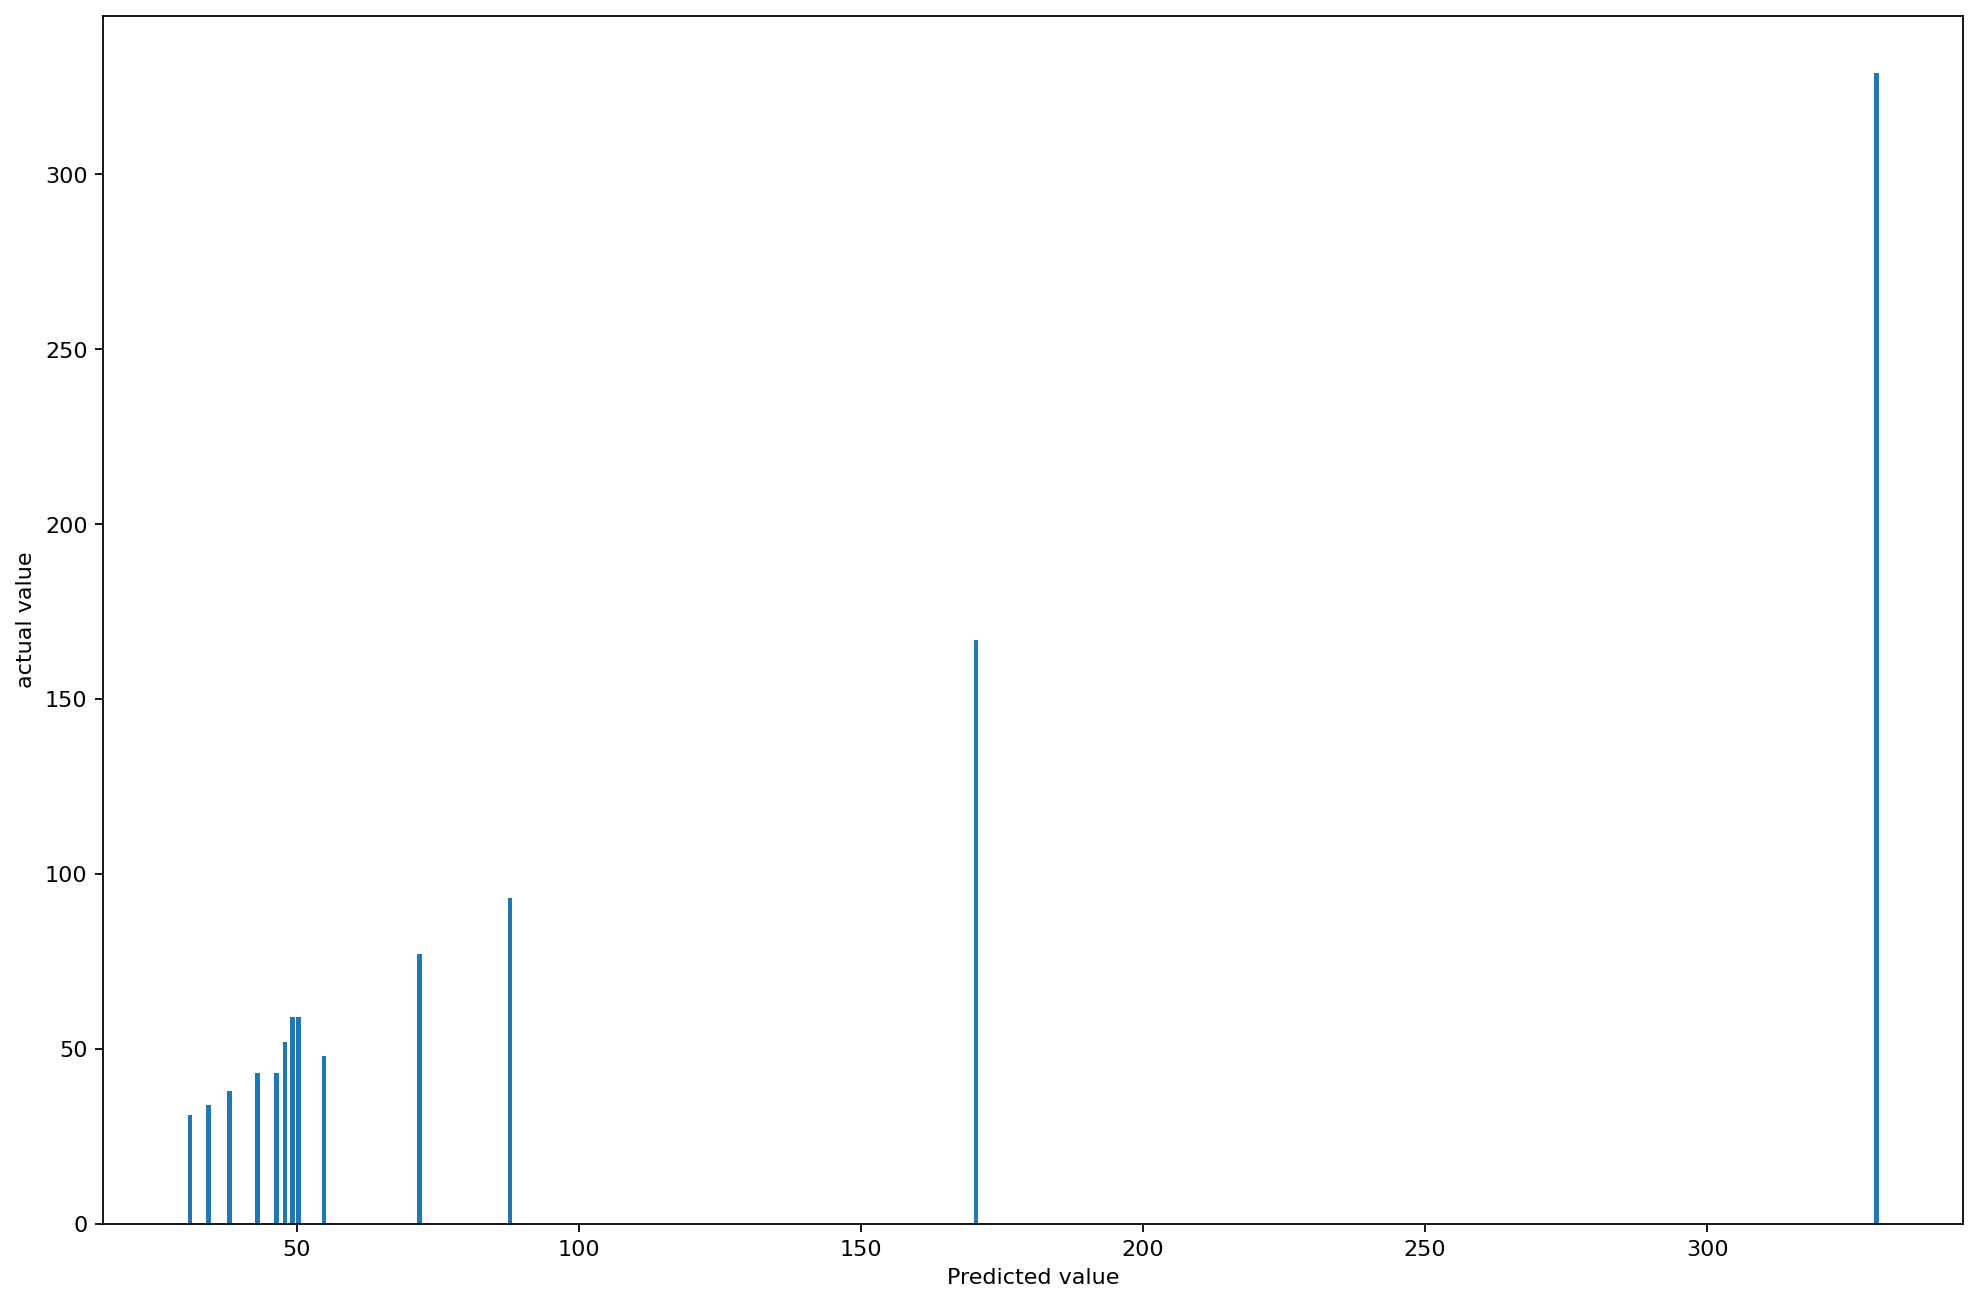

In [60]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=160, facecolor='w', edgecolor='k')

plt.bar(y_pred,y_test)
plt.xlabel('Predicted value')
plt.ylabel('actual value')
plt.show()